# Projeto Prático 4

Alunos:
- Manoel Victor Florencio de Souza
- Sérgio Alexandre Arruda Pinheiro

Base de Dados:

    A base de dados usada pode ser encontrada no Kaggle através do seguinte link: 
    https://www.kaggle.com/rwzhang/seeds-dataset

In [1]:
%pylab inline
import numpy as np
import pandas as pd

from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

from math import sqrt
from math import ceil

from mpl_toolkits.mplot3d import Axes3D

import warnings

Populating the interactive namespace from numpy and matplotlib


In [2]:
warnings.simplefilter("ignore")

# 1. Carregamento e Análise do Conjunto de Dados

In [3]:
names = ['area','perimeter','compactness','length','width','asymmetry','groove','type']

In [4]:
df = pd.read_csv('seeds_dataset.txt', '\t', names=names)
df['type'] = df['type'].map({1:'Kama', 2:'Rosa', 3:'Canadian'})

In [5]:
df.corr()

,area,perimeter,compactness,length,width,asymmetry,groove
area,1.000000,0.994341,0.608288,0.949985,0.970771,-0.229572,0.863693
perimeter,0.994341,1.000000,0.529244,0.972422,0.944829,-0.217340,0.890784
compactness,0.608288,0.529244,1.000000,0.367915,0.761635,-0.331471,0.226825
length,0.949985,0.972422,0.367915,1.000000,0.860415,-0.171562,0.932806
width,0.970771,0.944829,0.761635,0.860415,1.000000,-0.258037,0.749131
asymmetry,-0.229572,-0.217340,-0.331471,-0.171562,-0.258037,1.000000,-0.011079
groove,0.863693,0.890784,0.226825,0.932806,0.749131,-0.011079,1.000000


Ao analisar a matriz de correlação entre todas as variáveis da base de dados tem-se que os atributos *Area, Perimeter, Length, Width e Groove* possuem uma correlação positiva superior a 0.86 o que mostra que um atributo representa quase completamente os outros. Com isso, foi escolhido por deixar o atributo *Area* e retirar os demais, assim ficamos com 3 atributos preditores *Area, Compactness* e *Asymmetry*.

In [6]:
df = df.drop(['perimeter', 'length','width','groove'], axis=1)
X = df.iloc[:,:-1]
y = df.iloc[:,-1]
df.corr()

,area,compactness,asymmetry
area,1.000000,0.608288,-0.229572
compactness,0.608288,1.000000,-0.331471
asymmetry,-0.229572,-0.331471,1.000000


Aqui vemos que a correlação entre as variáveis restantes não supera 0.65 positivamente, nem 0.34 negativamente.

In [7]:
df_kama = df[df.type == 'Kama']
df_canadian = df[df.type == 'Canadian']
df_rosa = df[df.type == 'Rosa']

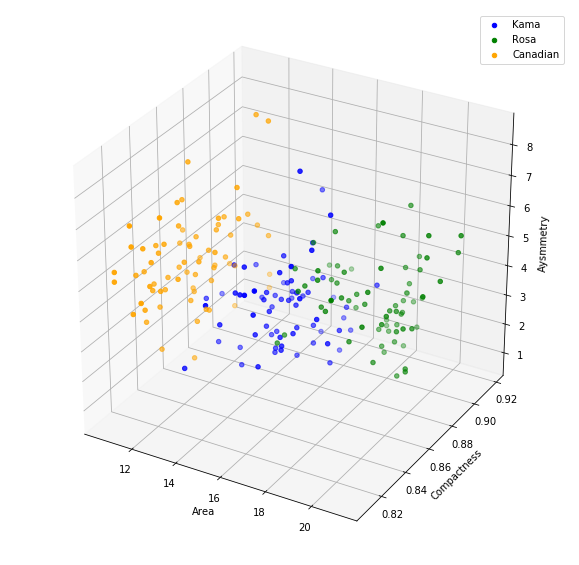

In [8]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1, 1, 1, projection='3d')
 
ax.scatter(df_kama.area, df_kama.compactness, df_kama.asymmetry, c='blue', label='Kama')
ax.scatter(df_rosa.area, df_rosa.compactness, df_rosa.asymmetry, c='green', label='Rosa')
ax.scatter(df_canadian.area, df_canadian.compactness, df_canadian.asymmetry, c='orange', label='Canadian')

ax.set_xlabel('Area')
ax.set_ylabel('Compactness')
ax.set_zlabel('Aysmmetry')

plt.legend()

A partir da análise do gráfico de dispersão acima, é possível notar que apenas as 3 variáveis selecionadas já apresentam uma separação clara entre as 3 classes.

# 2. Função Pirâmide, Parâmetros e Hiperparâmetros

A função **piramid()** retorna uma lista de tuplas contendo todas as possíveis combinações de neurônios aceitáveis pelo parâmetro **hidden_layer_sizes**  de acordo com a regra da piramide geométrica:
$$ N_{h} = \alpha \cdot \sqrt{N_{i} \cdot N_{o}}$$

In [9]:
def piramid(alpha=2, n_in=7, n_out=1):
    neurons = ceil(alpha * sqrt(n_in * n_out))
    ret = [(neurons,)]
    ret += [(neurons-n, n) for n in range(1, neurons)]
    return ret

Conjunto de parâmetros que irão constituir o *GridSearchCV*

In [10]:
params = {
    'activation': ['logistic', 'relu', 'tanh', 'identity'], 
    'max_iter': [200, 400, 600],
    'learning_rate_init': [0.001, 0.003, 0.01, 0.0005],
    'hidden_layer_sizes': list(piramid(alpha=0.5, n_in=3) + piramid(alpha=2, n_in=3) + piramid(alpha=3, n_in=3))
}

In [11]:
params

{'activation': ['logistic', 'relu', 'tanh', 'identity'],
 'max_iter': [200, 400, 600],
 'learning_rate_init': [0.001, 0.003, 0.01, 0.0005],
 'hidden_layer_sizes': [(1,),
  (4,),
  (3, 1),
  (2, 2),
  (1, 3),
  (6,),
  (5, 1),
  (4, 2),
  (3, 3),
  (2, 4),
  (1, 5)]}

# 3. Definição do GridSearchCV

In [12]:
clf = GridSearchCV(MLPClassifier(solver='lbfgs'), params, scoring='accuracy', cv=3, n_jobs=-1)

Por problemas decorridos em sala e sugestão da professora, a métrica a ser usada para avaliar o modelo foi a acurácia.

O solver *lbfgs* foi escolhido pois é o que melhor se adequa em relação ao número de exemplos na base de dados do problema (210) e de acordo com a documentação do sklearn "Para pequenas bases de dados, *lbfgs* converge mais rapidamente e obtém melhor performance"¹.

Referência: http://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html ¹

# 4. Treinamento dos Modelos

In [13]:
clf.fit(X, y)

GridSearchCV(cv=3, error_score='raise',
       estimator=MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='lbfgs', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'activation': ['logistic', 'relu', 'tanh', 'identity'], 'max_iter': [200, 400, 600], 'learning_rate_init': [0.001, 0.003, 0.01, 0.0005], 'hidden_layer_sizes': [(1,), (4,), (3, 1), (2, 2), (1, 3), (6,), (5, 1), (4, 2), (3, 3), (2, 4), (1, 5)]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=0)

# 5. Resultados Encontrados

In [14]:
print(clf.best_score_)
print(clf.best_params_)

0.9095238095238095
{'activation': 'identity', 'hidden_layer_sizes': (2, 2), 'learning_rate_init': 0.01, 'max_iter': 600}


In [15]:
best_params = clf.best_params_

- 4 funções de ativação

- 3 números de épocas

- 4 taxas de aprendizado

- 11 configurações de camadas ocultas encontradas a partir da função pirâmide

4 x 3 x 4 x 11 = 528 Classificadores

In [16]:
print('Foram criados 528 Classificadores e comparados entre si usando a métrica da acurácia para descobrir o melhor modelo, ao final foi encontrado a melhor configuração, tal que possui a função de ativação {}, com o número de neurônios nas camadas ocultas sendo de {}, taxa de aprendizado de {} e {} épocas.'.format(best_params['activation'], best_params['hidden_layer_sizes'], best_params['learning_rate_init'], best_params['max_iter']))

Foram criados 528 Classificadores e comparados entre si usando a métrica da acurácia para descobrir o melhor modelo, ao final foi encontrado a melhor configuração, tal que possui a função de ativação identity, com o número de neurônios nas camadas ocultas sendo de (2, 2), taxa de aprendizado de 0.01 e 600 épocas.
